# Performances

In [1]:
#libs
import os
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

In [2]:
# HOME

def find_txt_files(folder_path):

    txt_files_paths = []
    
    # Check for .txt files in the root folder
    txt_files_paths.extend(glob.glob(os.path.join(folder_path, '*.txt')))
    
    # Get all items in the root folder
    for item in os.listdir(folder_path):
        # Construct the full path of the item
        item_path = os.path.join(folder_path, item)
        # Check if this item is a directory and not in the exclude list
        if os.path.isdir(item_path):
            # If it's a directory, search for .txt files in it
            txt_files_paths.extend(glob.glob(os.path.join(item_path, '*.txt')))    
    
    return txt_files_paths

In [3]:
txt_path_list_3C280 = find_txt_files(r'C:\Users\teamROUXadmin\Desktop\3c280')

In [2]:
# LAB
def find_txt_files(folder_path, exclude_folders=None):
    # Initialize the exclude_folders list if it wasn't provided
    if exclude_folders is None:
        exclude_folders = [
            r'L:\everyone\sharedDATA\RawDATA\3C280\3C280_S08_NoRec',
            r'L:\everyone\sharedDATA\RawDATA\3C280\Rubbish'
        ]
    
    # This list will store the paths of .txt files
    txt_files_paths = []
    
    # Check for .txt files in the root folder
    txt_files_paths.extend(glob.glob(os.path.join(folder_path, '*.txt')))
    
    # Get all items in the root folder
    for item in os.listdir(folder_path):
        # Construct the full path of the item
        item_path = os.path.join(folder_path, item)
        # Check if this item is a directory and not in the exclude list
        if os.path.isdir(item_path) and item_path not in exclude_folders:
            # If it's a directory, search for .txt files in it
            txt_files_paths.extend(glob.glob(os.path.join(item_path, '*.txt')))
    
    return txt_files_paths

In [3]:
dir3C280 = r"L:\everyone\sharedDATA\RawDATA\3C280"
txt_path_list_3C280 = find_txt_files(dir3C280)
txt_path_list_3C280_old = txt_path_list_3C280[-40:-16] # sessions 28-33
txt_path_list_3C280_new = txt_path_list_3C280[-16:-4] # sessions 34,35,36

In [4]:
def performance_matrix(txt_files_paths):
    performance_list_all = [] 
    
    for path in txt_files_paths:
        s_x=[] # 1) ses_nb, 2) block_nb, 3) alpha rew, 4) beta rew, 5) with correction?, 6) before slash all 7) after slash all
        before_slash_list = []
        after_slash_list = []

        match = re.search(r'_S(\d+)_', path)
        s_x.append(int(match.group(1))) # ses_nb
        s_x.append(np.nan) # block_nb - dint figure out

        with open(path, 'r') as file:
            try:
                for line in file:
                    if "Protocol for session" in line:
                        # Extract protocol information using regular expressions
                        match = re.search(r'Alpha Trial = (\d+), Beta Trial = (\d+), correction implemented = (\d+)', line)
                        if match:
                            s_x.append(int(match.group(1))) #alpha_rew
                            s_x.append(int(match.group(2))) #beta_rew
                            s_x.append(int(match.group(3))) #corr
                    elif "Fraction correct trials" in line:
                        fraction_part = line.split('=')[-1].strip()
                        before_slash, after_slash = map(int, fraction_part.split('/'))
                        before_slash_list.append(before_slash)
                        after_slash_list.append(after_slash)
            except:
                continue

        s_x.append(before_slash_list)
        s_x.append(after_slash_list)
        performance_list_all.append(s_x)
    
    return performance_list_all

       
        

In [6]:
performance_list_all_old = performance_matrix(txt_path_list_3C280_old)
performance_list_all_new = performance_matrix(txt_path_list_3C280_new)

In [9]:
performance_list_all[0]

[32,
 nan,
 1,
 0,
 0,
 [1,
  1,
  2,
  3,
  3,
  3,
  3,
  4,
  5,
  6,
  7,
  7,
  8,
  8,
  8,
  9,
  10,
  11,
  11,
  11,
  12,
  13,
  14,
  15,
  16,
  16,
  17,
  18,
  19,
  20],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]]

In [18]:
def performances_ab(performance_list_all):
    alpha_performances = []
    beta_performances = []

    for performance_data in performance_list_all:
        try:
            performance_score = (performance_data[5][-1]/performance_data[6][-1])
            if performance_data[2]==1: #alpha-correct
                alpha_performances.append(performance_score)
            else:
                beta_performances.append(performance_score)
        except:
            continue
    return alpha_performances, beta_performances

In [8]:
alpha_performances_old, beta_performances_old = performances_ab(performance_list_all_old)
alpha_performances_new, beta_performances_new = performances_ab(performance_list_all_new)

In [13]:
# toy data
import random
alpha_performances = [random.uniform(0.1, 1.0) for _ in range(10)]
beta_performances = [random.uniform(0.1, 1.0) for _ in range(10)]

In [28]:
def performance_evolution_plot(alpha_performances, beta_performances, mouse='3C280'):

    plt.figure(figsize=(10,5))
    plt.plot(alpha_performances, label='alpha_performances')
    plt.plot(beta_performances, label='beta_performances')
    plt.ylabel('Ratio of correct answers')
    plt.ylim(0, 1)
    plt.xlabel('Block')
    plt.xticks(range(len(beta_performances)), labels=np.arange(1, len(beta_performances) + 1))
    plt.title(f'Performance evolution for {mouse}')
    plt.legend()
    plt.grid(True)
    plt.show()

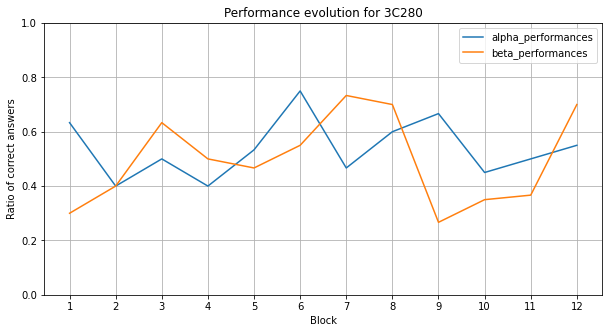

In [29]:
performance_evolution_plot(alpha_performances_old, beta_performances_old)

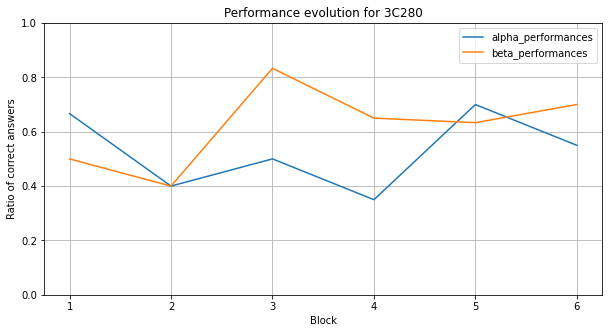

In [30]:
performance_evolution_plot(alpha_performances_new, beta_performances_new)

In [ ]:
txt_path_list_3C280_new = txt_path_list_3C280[-16:-4] # sessions 34,35,36

In [ ]:
txt_path_list_3C280

In [16]:
performance_list_all = performance_matrix(txt_path_list_3C280)

In [19]:
alpha_performances, beta_performances = performances_ab(performance_list_all)

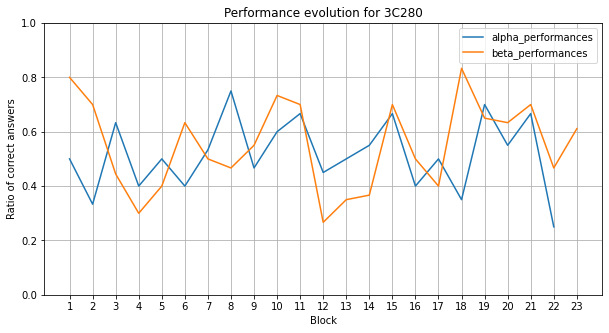

In [31]:
performance_evolution_plot(alpha_performances, beta_performances)